## E03 Convolutional Neural Networks (CNN)

In [66]:
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image

IMG_DIMS = (7,7)
FILTER_DIMS = (3,3)
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")

#### **E3.01** Calcular dimensiones espaciales

**Dimensiones Espaciales:** si asumimos una entrada de $(7 \times 7)$ y un filtro (campo receptivo) de $(3 \times 3)$, la salida de la convolución será un arreglo de ¿?

**Solución:** $(5 \times 5)$

#### **E3.02:** Calcular dimensiones del mapa de características

- Realizar una función que reciba como parámetros de entrada las dimensiones de la Imágen y las dimensiones del Filtro. La función deberá regresar como resultado (Salida) las dimensiones del mapa de características.

In [ ]:
def get_feature_map(img:tuple, f:tuple) -> tuple:
    feature_dims = list((0,0))
    for i in range(img[0]):
        i += f[0] - 1
        if (i < img[0]) : feature_dims[0] += 1
    for j in range(img[1]):
        j += f[1] - 1
        if (j < img[1]): feature_dims[1] += 1
    return feature_dims
            
print(get_feature_map(IMG_DIMS, FILTER_DIMS))
print(get_feature_map((7,9), (3,3)))

#### **E3.03:** Agregar $\text{stride}$ a la función de la `E3.01`

**Dimensiones espaciales** : si asumimos la misma entrada y
filtro del ejercicio 3.01, pero ahora incluimos un tamaño
de paso entre un producto punto a otro de 2, la salida de
la convolución será un arreglo de ¿?

**Solución:** $(3 \times 3)$

#### **E3.04** Calcular Mapa de Características con $\text{stride}$

Mejorar la implementación del `E3.02`. Realizar una  
función que reciba como parámetros de entrada las   
dimensiones de la **Imagen**, las dimensiones del **Filtro**  
y el tamaño del paso (stride). La función deberá  
regresar como resultado

In [ ]:
# Gets Feature Maps Dimensions
def get_fm(img:tuple, f:tuple, stride:np.int8) -> tuple:
    feature_dims = np.empty(2)
    feature_dims[0] = ((img[0] - f[0]) / stride) + 1
    feature_dims[1] = ((img[1] - f[1]) / stride) + 1
    return tuple(feature_dims)
            
print(get_fm(IMG_DIMS, FILTER_DIMS, 1))
print(get_fm(IMG_DIMS, FILTER_DIMS, 2))

**Resultados:**  
$7,7,3,3,2 | 3,3$  
$7,7,3,3,1 | 5,5$

#### **E3.05:** Calcular convolución de imágen y filtro

- **Dimensiones espaciales** : si asumimos la misma entrada y
filtro, pero incluimos un tamaño de paso entre un
producto punto a otro de 3, la salida de la convolución
será un arreglo de ¿?

#### **E3.06:** Mejorar la implementación del Ejercicio 3.04

Realizar una función que reciba como parámetros de entrada las  
dimensiones de la **Imagen**, las dimensiones del **Filtro** y el tamaño  
del paso **(stride)**. La función deberá regresar como resultado (Salida)  
las dimensiones del mapa de características y deberá **validar**   
que el filtro se pueda ajustar.  

In [ ]:
def get_fm(img:tuple, f:tuple, stride:np.int8) -> tuple:
    feature_dims = np.empty(2, dtype=np.int8)
    if (((img[0] - f[0]) % stride != 0) or ((img[1] - f[1]) % stride != 0)):
        return "Operation is not valid!"
    else:
        feature_dims[0] = (img[0] - f[0]) / stride + 1
        feature_dims[1] = (img[1] - f[1]) / stride + 1
    return tuple(feature_dims)

print(get_fm(IMG_DIMS, FILTER_DIMS, 1))
print(get_fm(IMG_DIMS, FILTER_DIMS, 2))
print(get_fm(IMG_DIMS, FILTER_DIMS, 3))

#### **E3.07:** Calcular convolución con $\text{stride} = 1$ y zero padding

- Dimensiones espaciales : si asumimos una entrada de 7x7, un filtro de 5x5, un
tamaño de paso entre un producto punto a otro de 1 y agregamos un relleno de
ceros ( zero padding ) de un pixel, la salida de la convolución será un arreglo de ¿?

#### **E3.08:** Calcular las dimensiones del mapa de características con validación de filtro.

Mejorar la implementación del ejercicio 3.06. Realizar
una función que reciba como parámetros de entrada las
dimensiones de la Imagen , las dimensiones del Filtro , el
tamaño del paso ( stride ) y la indicación si se incluye un relleno de ceros. La función deberá regresar como
resultado ( Salida ) las dimensiones del mapa de
características y deberá validar que el filtro se pueda
ajustar.

#### **E3.09:** Recortar imágen

- Carga la imágen de `china.jpg` disponible en `sklearn.datasets`  
y realizarle un preprocesamiento, el cual consiste en recortar la  
imagen y convertirla a escala de grises.

- Crear un par de filtros, uno para líneas verticales y otro para líneas horizontales con dimensiones $7 \times 7$. Los filtros deberán estar en un arreglo llamado `filters`. Imprimir el contenido numérico de los filtros y desplegarlos gráficamente.

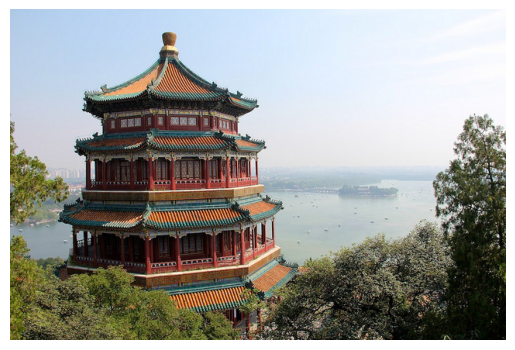

In [2]:
fig, ax = plt.subplots()
ax.axis("off")
ax.imshow(china)

In [3]:
image = china[150:220, 130:250]
image.shape

(70, 120, 3)

In [4]:
height, width, channels = image.shape
image_grayscale = image.mean(axis=2).astype(np.float32)
image_grayscale.shape

(70, 120)

In [5]:
images = image_grayscale.reshape(1, height, width, 1)
images.shape

(1, 70, 120, 1)

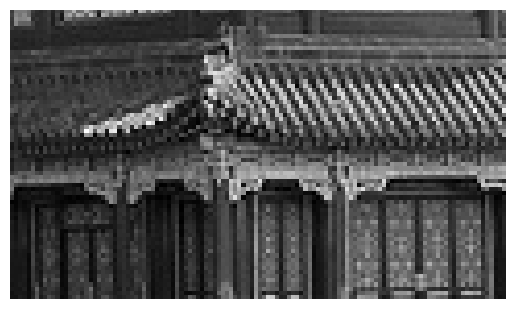

In [6]:
fig, ax = plt.subplots(); ax.axis("off")
ax.imshow(image_grayscale, cmap='gray')

In [7]:
# Vertical Filter
vertical = np.zeros((7,6))
vertical = np.insert(vertical, vertical.shape[0]//2, np.ones(vertical.shape[0]), axis=1)

# Horizontal Filter
horizontal = np.zeros((6,7))
horizontal = np.insert(horizontal, horizontal.shape[1]//2, np.ones(vertical.shape[0]), axis=0)

print(f"VERTICAL:\n{vertical}\n\nHORIZONTAL:\n{horizontal}")

VERTICAL:
[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]

HORIZONTAL:
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


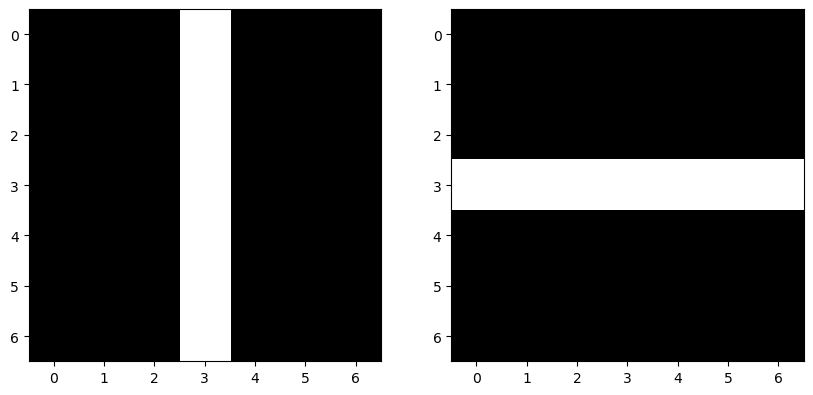

In [8]:
fig = plt.figure(figsize=(10, 10)) 
rows=1; cols=2

fig.add_subplot(rows,cols, 1); 
plt.imshow(vertical, cmap='gray')

fig.add_subplot(rows,cols, 2); 
plt.imshow(horizontal, cmap='gray')

In [9]:
filters = np.stack((horizontal, vertical), axis=2)
filters = np.reshape(filters, newshape=(horizontal.shape[0],vertical.shape[0],1,2))
filters.shape

(7, 7, 1, 2)

In [10]:
horizontal_resh = np.expand_dims(horizontal, axis=-1)
vertical_resh = np.expand_dims(vertical, axis=-1)

horizontal_rgb = np.repeat(horizontal_resh, 3, axis=-1)
vertical_rgb = np.repeat(vertical_resh, 3, axis=-1)

filters_rgb = np.stack((horizontal_rgb, vertical_rgb), axis=-1)
filters_rgb.shape

(7, 7, 3, 2)

#### **E3.10:** Implementar capa convolucional aplicada `china.jpg`

Implementar una capa convolucional empleando `tf.nn.conv2d`  
y los filtros (`filters`) creados para obtener los mapas de   
características de la imágen (`china.jpg`) pre-procesada (`images`).  
Utilizar un paso de uno (`strides=1`) y un relleno de ceros (`padding="SAME"`).

Desplegar los mapas de características (salidas obtenidas  
de la capa convolucional)

In [12]:
x = tf.constant(images, dtype=tf.float32)
kernel = tf.constant(filters, dtype=tf.float32)
a = tf.nn.conv2d(x, kernel, strides=1, padding='SAME')

(-0.5, 119.5, 69.5, -0.5)

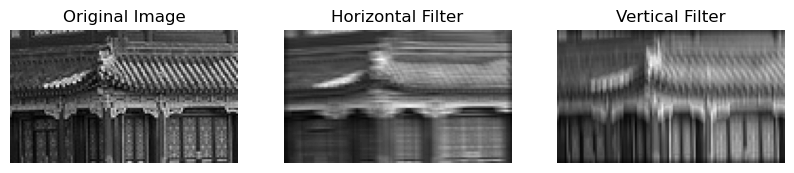

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(10, 10)) 

axs[0].imshow(image_grayscale, cmap='gray')
axs[0].set_title("Original Image")
axs[0].axis("off")

axs[1].imshow(a[0,:,:,0], cmap='gray')
axs[1].set_title("Horizontal Filter")
axs[1].axis("off")

axs[2].imshow(a[0,:,:,1], cmap='gray')
axs[2].set_title("Vertical Filter")
axs[2].axis("off")


#### **3.11:** Implementar convolución

$z_{i,j,k}= b_{k} + \sum_{u=0}^{f_{h}-1} \sum_{v=0}^{f_{w}-1} \sum_{k'=0}^{f_{n'}-1} x_{i',j',k'} \cdot w_{u,v,k',k}\;\;\;with \begin{cases} &  i'=  i \times s_{h} + u\\   &  j' = j \times s_{w} + v  \end{cases}$    

- Implementar una función para la expresión del cálculo de la salida de una neurona ($z_{i,j,k}$). Considere un  
mapa de caracerísticas (imagen de entrada) con dimensiones $H \times W \times K$, con un campo receptivo (filtro)  
con dimensiones $f_{h} \times f_{w} \times f_{n'}$. Considere el $stride$ como parámetro de entrada y deje fijo el sesgo en 1.

In [ ]:
red = np.array([[0,0,0,0,0,0],[0,156,155,156,158,158],[0,153,154,157,159,159],[0,146,151,155,158,159]])
green = np.array([[0,0,0,0,0,0],[0,167,166,167,169,169],[0,164,165,168,170,170],[0,160,162,166,169,170]])
blue = np.array([[0,0,0,0,0,0],[0,163,162,163,165,165],[0,160,161,164,166,166],[0,156,158,162,165,166]])

channels = np.stack((red, green, blue), axis=2)
channels = channels.reshape(1, red.shape[0], red.shape[1], 3)
channels.shape

In [ ]:
filter_red = np.array([[-1,-1,1],[0,1,-1],[0,1,1]])
filter_green = np.array([[1,0,0],[1,-1,-1],[1,0,-1]])
filter_blue = np.array([[0,1,1],[0,1,0],[1,-1,1]])

filters = np.stack((filter_red, filter_green, filter_blue), axis=2)
filters = np.reshape(filters, newshape=(filter_red.shape[0],filter_red.shape[1],1,3))
filters.shape

In [ ]:
def z(channels:np.ndarray, filters:np.ndarray, stride:np.int8) -> np.ndarray:
    # Get feature maps dimensions
    fm_dims = get_fm((channels.shape[1],channels.shape[2]), (filters.shape[0],filters.shape[1]), stride)
    
    # Declare output array
    z = np.zeros((fm_dims[0], fm_dims[1]), dtype=np.int64)
    
    # Filter Height (Rows) and Filter Width (Columns)
    fh, fw = filters.shape[0:2]

    # Compute dot product between filter and image's channels on 
    # each position the filters adjust
    for i in range(fm_dims[0]):
        for j in range(fm_dims[1]):
            for k in range(channels.shape[3]):
                z[i,j] += np.dot(
                    channels[..., k][0,i:fh+i,j:fw+j].flatten(), 
                    filters[...,k].flatten())
    
    return z + 1

z(channels, filters, 1)

#### **E3.12:** Aplicar filtros

Cargar las imágenes `china.jpg` y `flower.jpg` disponibles `sklearn.datasets`

- Aplicar los filtros (líneas vertical y horizontal) a las imágenes
utilizando una capa convolucional construida con la función `conv2d()`

- 

In [21]:
# Load sample images
china = china / 255
flower = flower / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape
images.shape

(2, 427, 640, 3)

In [22]:
# Convolution Layer
x = tf.constant(images, dtype=tf.float64)
kernel = tf.constant(filters_rgb, dtype=tf.float64)
outputs = tf.nn.conv2d(images, kernel, strides=1, padding="SAME")

In [25]:
outputs.shape

TensorShape([2, 427, 640, 2])

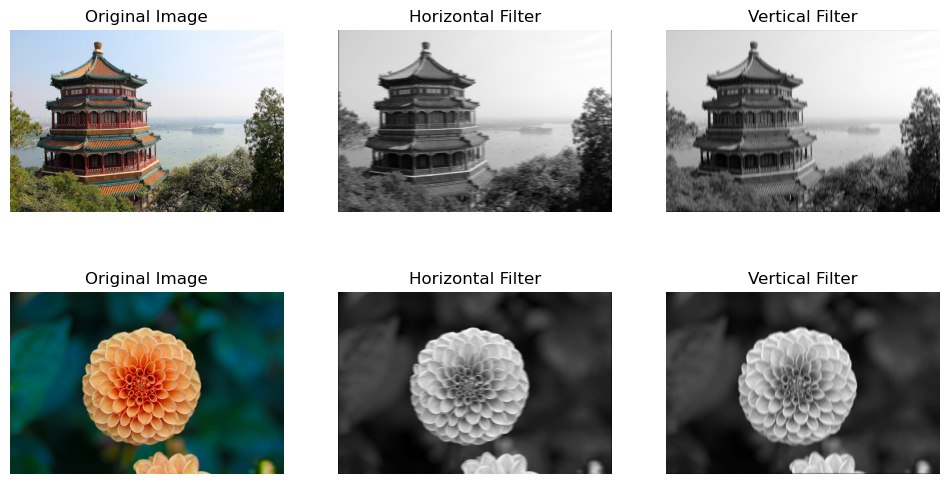

In [64]:
fig, axs = plt.subplots(2, 3, figsize=(12, 12)) 

for x, img in enumerate(images, start=0):
    axs[x,0].imshow(img)
    axs[x,0].set_title(f"Original Image")
    axs[x,0].axis('off')

for i in range(outputs.shape[0]):
    for j in range(outputs.shape[-1]):
        axs[i,j+1].imshow(outputs[i,:,:,j], cmap='gray')
        axs[i,j+1].set_title(f"{'Horizontal Filter' if j == 0 else 'Vertical Filter'}")
        axs[i,j+1].axis('off')

plt.subplots_adjust(top=0.4, bottom=0.0)

#### **E3.13**: Implementar Capa de Agrupación Máxima

- Implementar una capa de agrupación máxima (max pooling layer) en Tensorflow es bastante sencillo.

- El siguiente código crea una capa de agrupación máxima utilizando un kernel $2 \times 2$.  
El `stride` se ajusta por defecto al tamaño del kernel, por lo que esta capa utilizará un   
`stride` de 2 (tanto horizontal como vertical). De forma predeterminada, utiliza un relleno     
`VALID` (es decir, ningún relleno).

- Desplegar las imágenes de entrada y salida

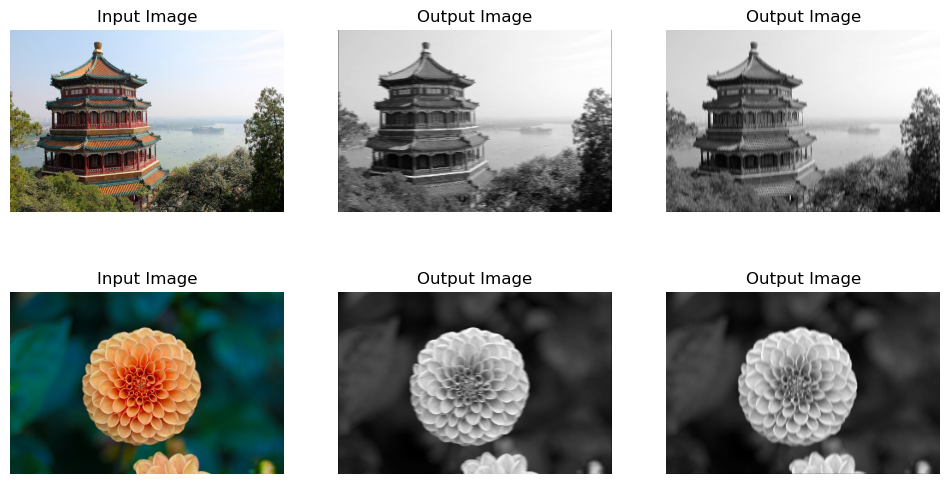

In [82]:
max_pool_2d = keras.layers.MaxPool2D(pool_size=(2,2), strides=2, padding='valid')
pooling_outputs = max_pool_2d(outputs)

fig, axs = plt.subplots(2, 3, figsize=(12, 12)) 

for x, img in enumerate(images, start=0):
    axs[x,0].imshow(img)
    axs[x,0].set_title(f"Input Image")
    axs[x,0].axis('off')

for i in range(outputs.shape[0]):
    for j in range(outputs.shape[-1]):
        axs[i,j+1].imshow(pooling_outputs[i,:,:,j], cmap='gray')
        axs[i,j+1].set_title("Output Image")
        axs[i,j+1].axis('off')

plt.subplots_adjust(top=0.4, bottom=0.0)

#### **Ejercicio 3.14** : Implementar una Average Pooling Layer.

- Implementar una capa de agrupación promedio (average pooling layer).
- Desplegar las imágenes de entrada y de salida.

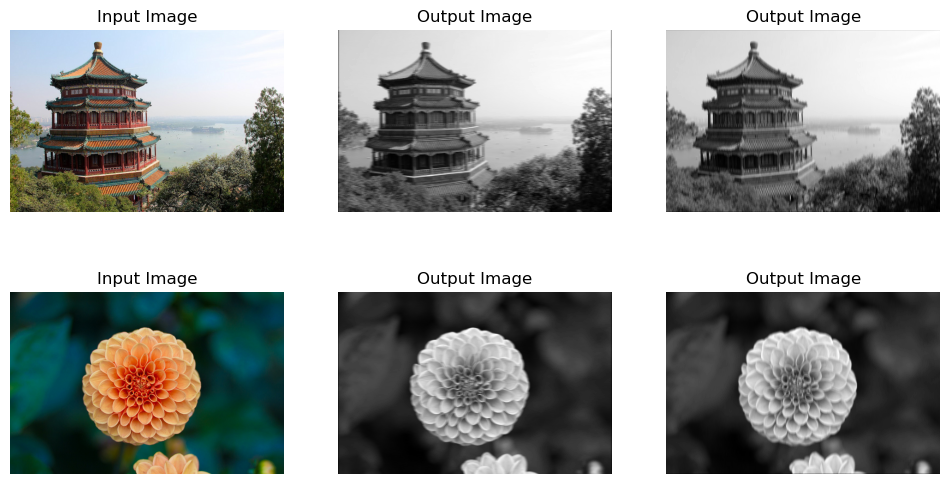

In [83]:
avg_pool_2d = keras.layers.AveragePooling2D(pool_size=(2,2), strides=2, padding='valid')
pooling_outputs = avg_pool_2d(outputs)

fig, axs = plt.subplots(2, 3, figsize=(12, 12)) 

for x, img in enumerate(images, start=0):
    axs[x,0].imshow(img)
    axs[x,0].set_title(f"Input Image")
    axs[x,0].axis('off')

for i in range(outputs.shape[0]):
    for j in range(outputs.shape[-1]):
        axs[i,j+1].imshow(pooling_outputs[i,:,:,j], cmap='gray')
        axs[i,j+1].set_title("Output Image")
        axs[i,j+1].axis('off')

plt.subplots_adjust(top=0.4, bottom=0.0)